# Logistic Regression

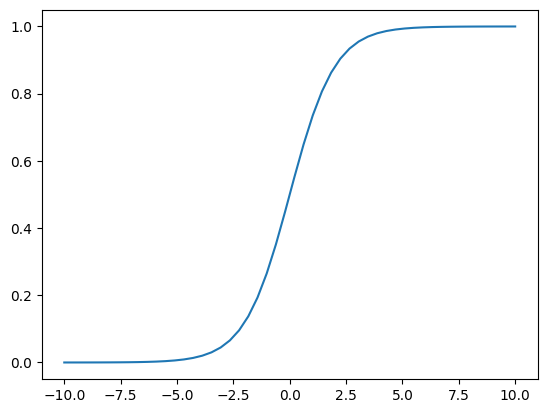

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(logits):
    return 1 / (1 + np.exp(-logits))

xs = np.linspace(-10, 10)
plt.plot(xs, sigmoid(xs));

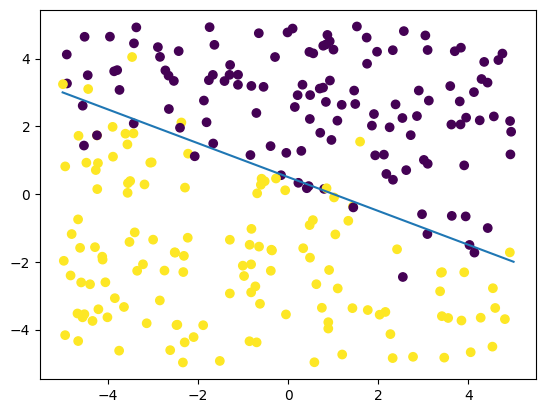

In [2]:
N_POINTS = 256
X = (np.random.rand(N_POINTS, 2) * 10) - 5

Xi = np.hstack((np.ones((N_POINTS, 1)), X))
theta_true = np.array([-1, 1, 2])
logits = Xi @ theta_true
probs = sigmoid(logits)
classes = (np.random.random(N_POINTS) > probs).astype(np.int32)

plt.scatter(X[:, 0], X[:, 1], c=classes, cmap="viridis")

xs = np.linspace(-5, 5)
ys = ((-theta_true[1] / theta_true[2]) * xs) - (theta_true[0] / theta_true[2])
plt.plot(xs, ys);

[-0.71521026  1.          1.92552651]


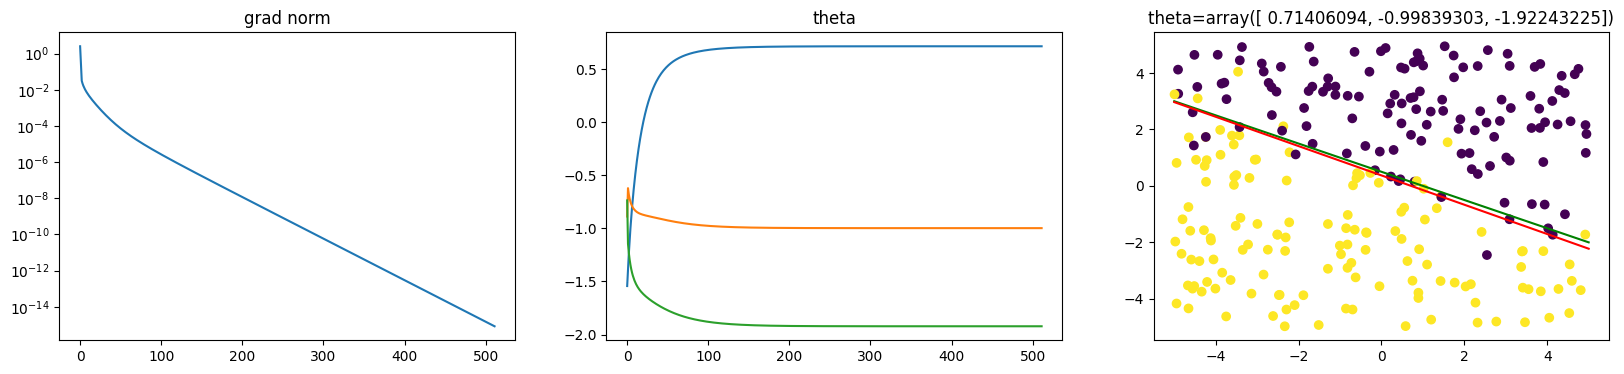

In [3]:
theta = np.random.randn(3)
lr = 1.0

grad_norms = []
thetas_true = [[], [], []]

for _ in range(512):
    pred_probs = sigmoid(Xi @ theta)
    grad = ((classes - pred_probs)[:, None] * Xi).mean(axis=0)
    theta += (lr * grad)

    grad_norms.append((grad ** 2).sum())
    for i in range(len(thetas_true)):
        thetas_true[i].append(theta[i])

fig, (grad_ax, theta_ax, pred_ax) = plt.subplots(ncols=3, figsize=(20, 4))
grad_ax.plot(grad_norms)
grad_ax.set_title("grad norm")
grad_ax.set_yscale("log")

for ts in thetas_true:
    theta_ax.plot(ts)
theta_ax.set_title("theta")

pred_ax.scatter(X[:, 0], X[:, 1], c=classes, cmap="viridis")
y_preds = ((-theta[1] / theta[2]) * xs) - (theta[0] / theta[2])
pred_ax.plot(xs, ys, c="green")
pred_ax.plot(xs, y_preds, c="red")
pred_ax.set_title(f"{theta=}")
print(theta / theta[1])  # theta is "directionally" correct.

# Softmax reg

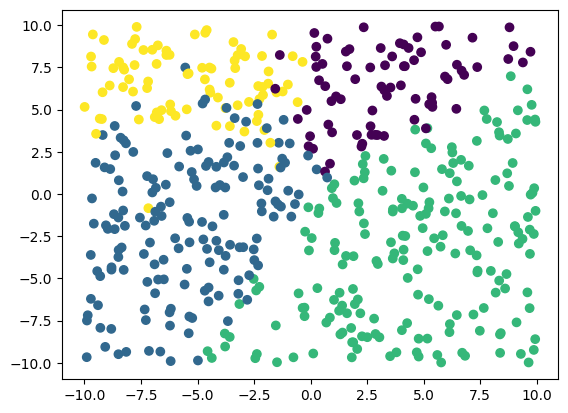

In [4]:
N_POINTS = 512
X = (np.random.rand(N_POINTS, 2) * 20) - 10

Xi = np.hstack((np.ones((N_POINTS, 1)), X))

thetas_true = np.array([
    [1, 3, 2, -1],
    [2, -1, 5, -1],
    [3, 2, -1, 3]
])

def softmax(logits, axis=-1):
    safe_logits = logits - logits.max()
    unnorm_probs = np.exp(safe_logits)
    return unnorm_probs/ unnorm_probs.sum(axis=axis, keepdims=True)

logits = Xi @ thetas_true
probs = softmax(logits)
cum_probs = np.cumsum(probs, axis=1)
classes = (np.random.random(N_POINTS)[:, None] > cum_probs).sum(axis=1)

plt.scatter(X[:, 0], X[:, 1], c=classes);

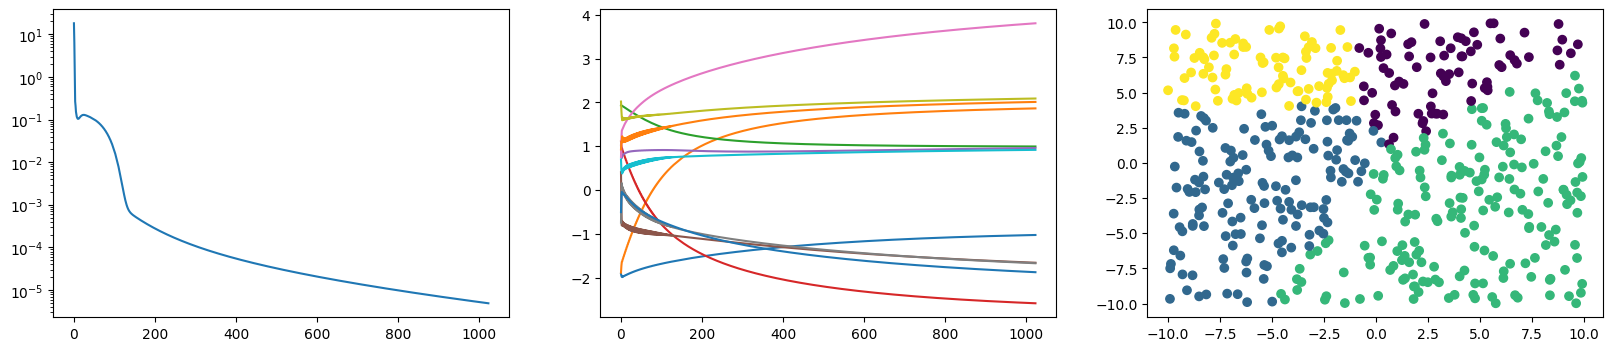

In [5]:
thetas = np.random.randn(3, 4)
lr = 0.5

N_CLASSES = 4
one_hot_classes = np.zeros((N_POINTS, N_CLASSES))
one_hot_classes[np.arange(N_POINTS), classes] = 1

grad_norms = []
theta_tracker = [[] for _ in range(12)]

for _ in range(1024):
    logits = Xi @ thetas
    probs = softmax(logits)
    grad = ((probs - one_hot_classes)[:, :, None] * np.expand_dims(Xi, axis=1)).mean(axis=0).T
    thetas -= lr * grad

    grad_norms.append((grad ** 2).sum())
    for i in range(thetas.shape[0]):
        for j in range(thetas.shape[1]):
            theta_tracker[thetas.shape[1] * i + j].append(thetas[i, j])

fig, (grad_ax, theta_ax, pred_ax) = plt.subplots(ncols=3, figsize=(20, 4))

grad_ax.plot(grad_norms)
grad_ax.set_yscale("log")

for ts in theta_tracker:
    theta_ax.plot(ts)

pred_probs = softmax(Xi @ thetas)
pred_classes = np.argmax(pred_probs, axis=1)
pred_ax.scatter(X[:, 0], X[:, 1], c=pred_classes);